# <center> Credit Card Fraud Detection</center>

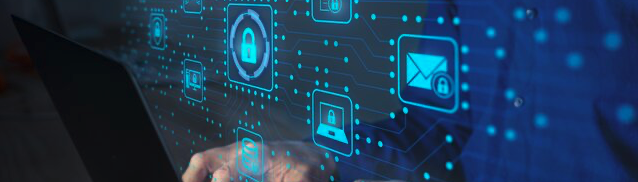

# Agenda

1. Business challenge

2. Data review

3. Data processing

4. Resampling

5. Decision Tree

6. Random forest

7. Tune the model

8. Save the model

### Business challenge

Detecting fraud transactions is of great importance for any credit card company. My task is to detect potential frauds so that customers are not charged for items that they did not purchase. The goal is to build a classifier that tells if a transaction is a fraud or not.

### Data review

The dataset is the Kaggle Credit Card Fraud Detection dataset [here](https://www.kaggle.com/datasets/yashpaloswal/fraud-detection-credit-card?datasetId=2467696).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
import itertools
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

import sklearn
from sklearn import *

from sklearn.utils import resample

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
def print_metrics(X, y, model):
    
    y_pred = model.predict(X)
    print('------------------')
    print('Accuracy score = ',accuracy_score(y, y_pred.round()))
    print('Precision score = ',precision_score(y, y_pred.round()))
    print('Recall score = ',recall_score(y, y_pred.round()))
    print('F1 score = ' ,f1_score(y, y_pred.round()))
    print('ROC-AUC score = ',roc_auc_score(y, y_pred))

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<div style="background-color:#a2dce8">This dataset has no missig values, it only contains numerical variables. Principal components (V1-V28) obtained with PCA transformation. The only features which have not been transformed are ‘Time’ and ‘Amount’. ‘Time’ is the seconds elapsed between each transaction and the first. ‘Amount’ is the transaction amount. ‘Class’ is the response variable with 1 as fraud and 0 otherwise.</div>

In [6]:
df['class'].value_counts()

0    284315
1       492
Name: class, dtype: int64

 <div style="background-color:#a2dce8">The dataset contains 492 frauds out of 284,807 transactions. Thus, it is highly unbalanced. In such unbalansed data prediction of bigger class will be 99%. So the data need to be resampled</div>

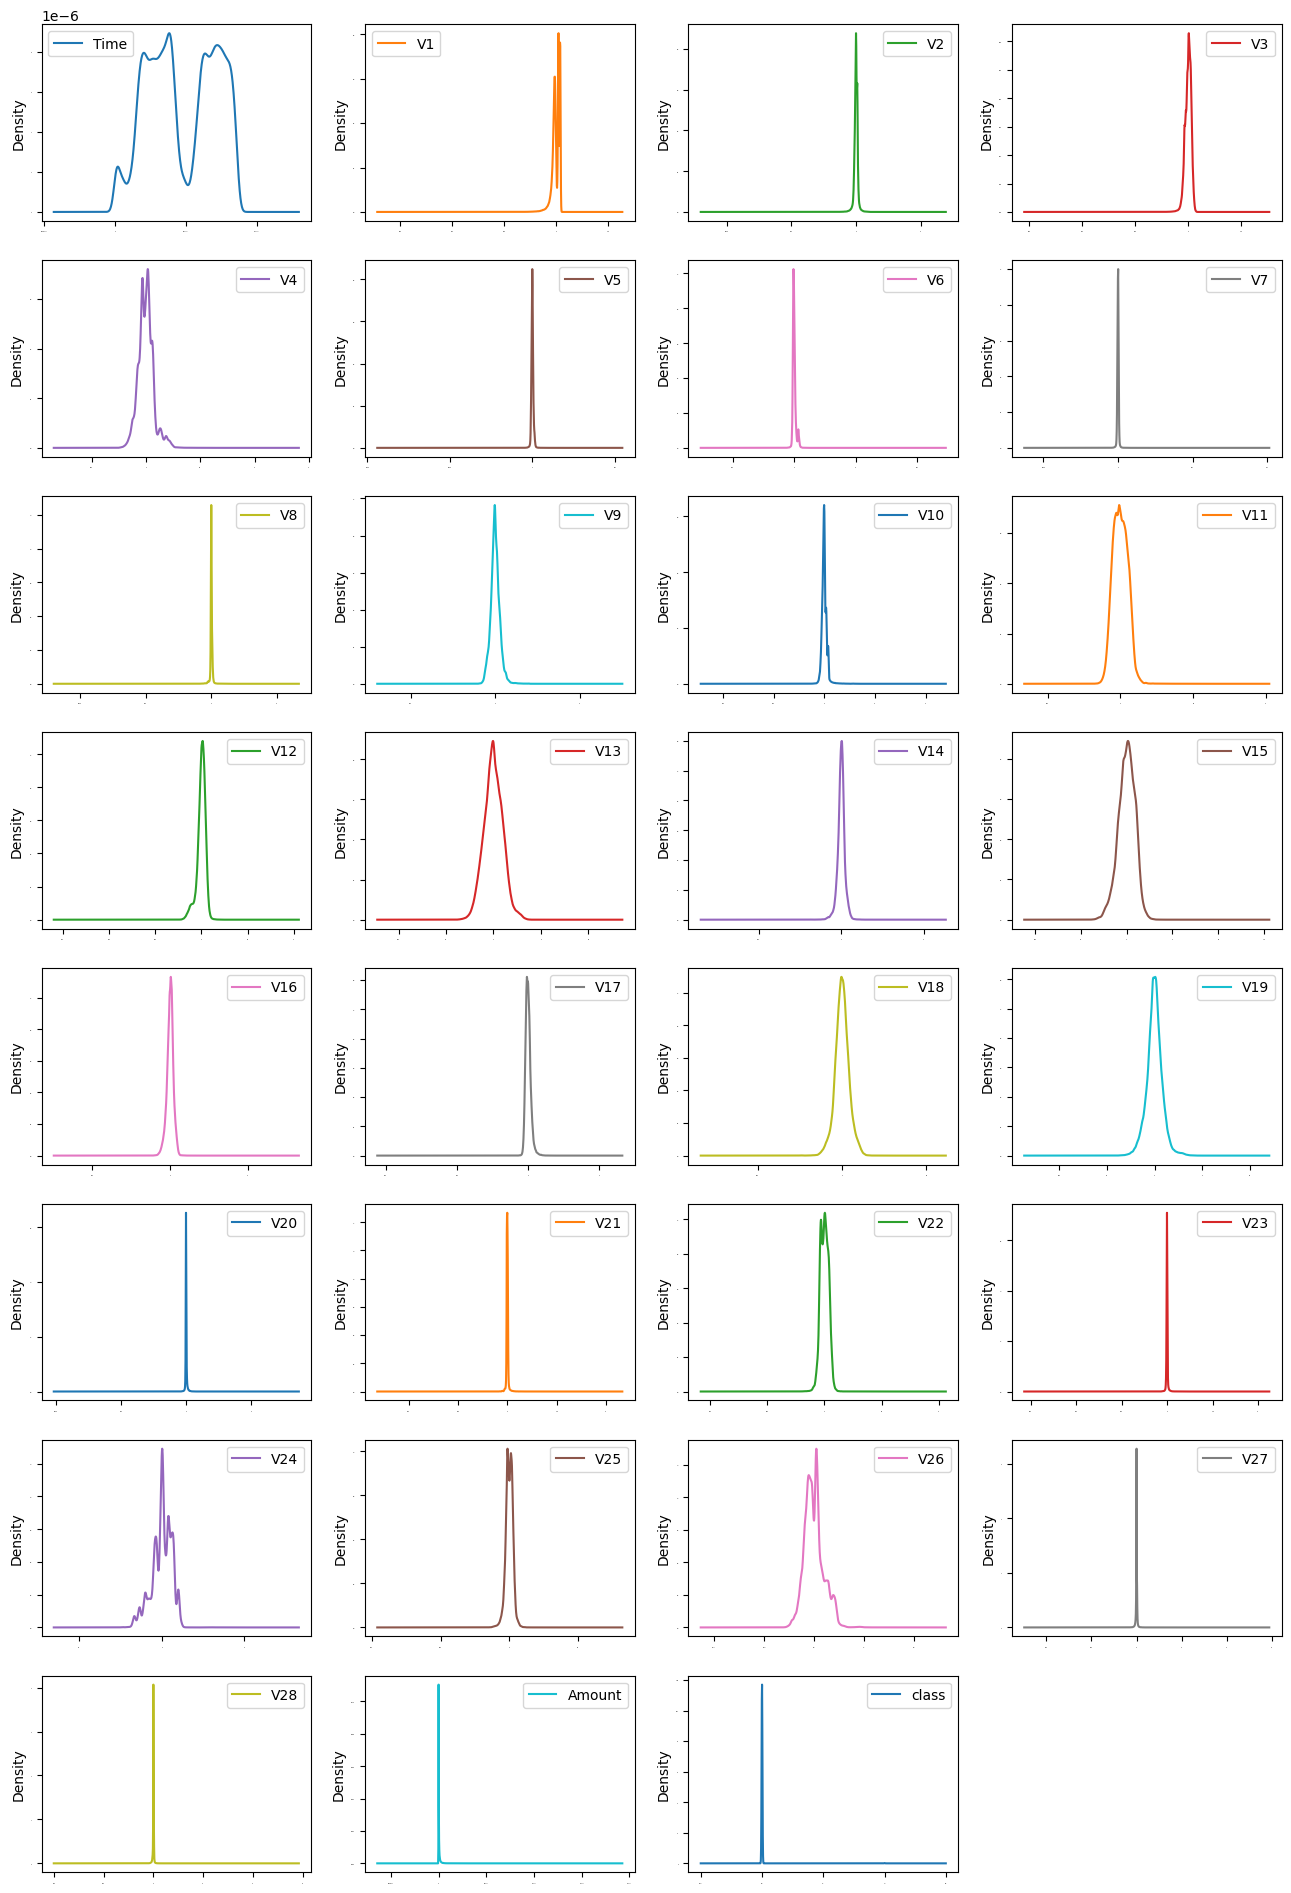

In [7]:
df.plot(
    kind='kde', 
    subplots=True, 
    layout=(8,4), 
    sharex=False, 
    legend=True,
    fontsize=1, 
    figsize=(16,24)
);

<div style="background-color:#a2dce8">Conclutions:
    
- class 0 = Non Fraudulent

- class 1 = Fraudulent

- V's 1 a 28 = confidential data that goes from negative numbers to positive numbers, PCA transformed
    
- Amount = Transaction value

- Time - Transaction time </div>

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<div style="background-color:#a2dce8">The variable ‘Amount’ ranges from 0 to 25,691.16. Use Standardization so that more then 50% of the values lie in between (-1, 1)</style>

### Data processing

In [9]:
scaler = StandardScaler()
df["NormAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))

In [10]:
df_del = df.drop(["Amount", "Time"], axis = 1)
y = df_del["class"]
X = df_del.drop(["class"], axis = 1)

In [11]:
X_train_full, X_test = train_test_split(X, test_size=0.2, random_state=11)
X_train, X_val = train_test_split(X_train_full, test_size=0.25, random_state=11)
y_train_full, y_test = train_test_split(y, test_size=0.2, random_state=11)
y_train, y_val = train_test_split(y_train_full, test_size=0.25, random_state=11)

In [12]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
print('Metrics for test data set: ')
print_metrics(X_test, y_test, decision_tree_model)

Metrics for test data set: 
------------------
Accuracy score =  0.9990168884519505
Precision score =  0.7363636363636363
Recall score =  0.75
F1 score =  0.7431192660550459
ROC-AUC score =  0.8747449607767264


In [14]:
print('Metrics for validation data set: ')
print_metrics(X_val, y_val, decision_tree_model)

Metrics for validation data set: 
------------------
Accuracy score =  0.9991924440855307
Precision score =  0.7526881720430108
Recall score =  0.7526881720430108
F1 score =  0.7526881720430108
ROC-AUC score =  0.8761418668862999


Confusion matrix, without normalization


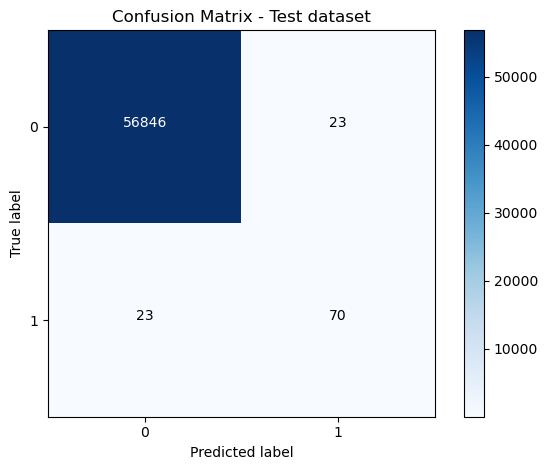

In [15]:
y_pred = decision_tree_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred.round())
plot_confusion_matrix(cm, classes = [0, 1], title = 'Confusion Matrix - Test dataset')

<div style="background-color:#a2dce8">The problem of unmalanced dataset id very well demonstrated here. The accuracy is hight but in dousn't indicate good performance. Accuracy is the sum of Ture Negative and True Positive divided by total dataset size. If 95% of the dataset is Negative (non-frauds), the network will cleverly predict all to be Negative, leading to 95% accuracy. However, for fraud detection, detecting Positive matters more than detecting Negative.</div>

In [16]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
print('Metrics for test data set: ')
print_metrics(X_test, y_test, rf_model)

Metrics for test data set: 
------------------
Accuracy score =  0.999403110845827
Precision score =  0.9021739130434783
Recall score =  0.7685185185185185
F1 score =  0.8300000000000001
ROC-AUC score =  0.8841801091554848


In [18]:
print('Metrics for validation data set: ')
print_metrics(X_val, y_val, rf_model)

Metrics for validation data set: 
------------------
Accuracy score =  0.9995786664794073
Precision score =  0.9259259259259259
Recall score =  0.8064516129032258
F1 score =  0.8620689655172414
ROC-AUC score =  0.9031730536337332


Confusion matrix, without normalization


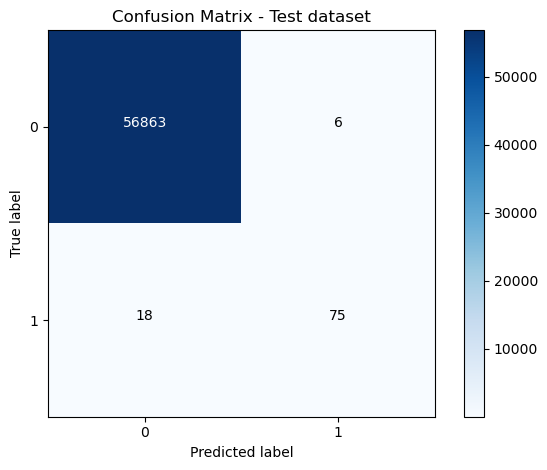

In [19]:
y_pred = rf_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred.round())
plot_confusion_matrix(cm, classes = [0, 1], title = 'Confusion Matrix - Test dataset')

<div style="background-color:#a2dce8">Change the model do not change the situation. We need to resample the data to make the dataset balances. There are more way how to do it but we well you only one of them.</div>

## Resampling

In [20]:
detection_true = df_del[df_del['class'] == 1.0]
detection_false = df_del[df_del['class'] == 0.0]

# Upsample the minority class
detection_true_upsampled = resample(detection_true, random_state=13, n_samples=280000)
detection_upsampled = pd.concat([detection_true_upsampled, detection_false])

In [21]:
y = detection_upsampled["class"]
X = detection_upsampled.drop(["class"], axis = 1)
X_train_full, X_test = train_test_split(X, test_size=0.2, random_state=11)
X_train, X_val = train_test_split(X_train_full, test_size=0.25, random_state=11)
y_train_full, y_test = train_test_split(y, test_size=0.2, random_state=11)
y_train, y_val = train_test_split(y_train_full, test_size=0.25, random_state=11)

## Decision tree

In [22]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

In [23]:
print('Metrics for test data set: ')
print_metrics(X_test, y_test, decision_tree_model)

Metrics for test data set: 
------------------
Accuracy score =  0.999681029212408
Precision score =  0.9993577392421323
Recall score =  1.0
F1 score =  0.9996787664632188
ROC-AUC score =  0.9996833605995039


In [24]:
print('Metrics for validation data set: ')
print_metrics(X_val, y_val, decision_tree_model)

Metrics for validation data set: 
------------------
Accuracy score =  0.9996190071148207
Precision score =  0.999232101719735
Recall score =  1.0
F1 score =  0.9996159033863029
ROC-AUC score =  0.9996222038693353


Confusion matrix, without normalization


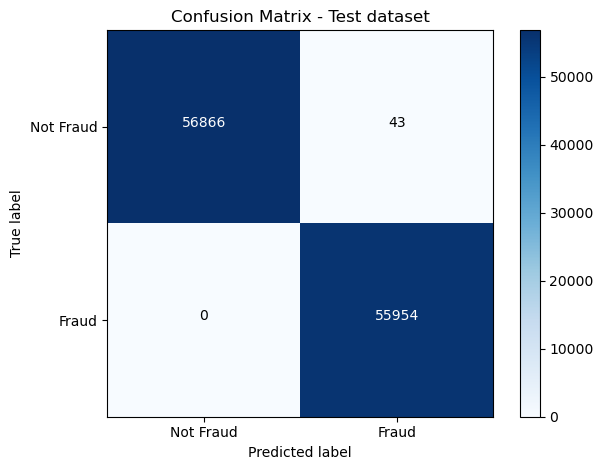

In [25]:
y_pred = decision_tree_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred.round())
plot_confusion_matrix(cm, classes = ['Not Fraud', 'Fraud'], title = 'Confusion Matrix - Test dataset')

## Random forest

In [26]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
print('Metrics for test data set: ')
print_metrics(X_test, y_test, rf_model)

Metrics for test data set: 
------------------
Accuracy score =  0.9999113970034467
Precision score =  0.9998215114411166
Recall score =  1.0
F1 score =  0.9999107477553061
ROC-AUC score =  0.9999120446109734


In [28]:
print('Metrics for val data set: ')
print_metrics(X_val, y_val, rf_model)

Metrics for val data set: 
------------------
Accuracy score =  0.9999379779024127
Precision score =  0.9998749128857597
Recall score =  1.0
F1 score =  0.9999374525309387
ROC-AUC score =  0.9999384983043104


Confusion matrix, without normalization


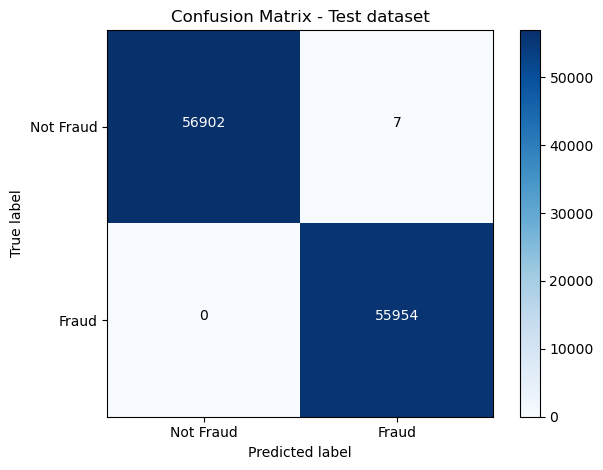

In [29]:
y_pred = rf_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred.round())
plot_confusion_matrix(cm, classes = ['Not Fraud', 'Fraud'], title = 'Confusion Matrix - Test dataset')

## Tune the model

<div style="background-color:#a2dce8">Before the model tuning 4 models were rested: Decision Tree with under-sampling, Random Forest with under-sampling, and Decision Tree, Random Forest with resamplesd data sets. The best performer was Random Forest with balances data set.
This model will be saved and precessed to the production.</div>

|                          | Accuracy score | Precision score | Recall score | F1 score | ROC-AUC |
|--------------------------|----------------|-----------------|--------------|----------|---------|
| Decision Tree unbalanced | 0.999          | 0.754           | 0.768        | 0.761    | 0.884   |
| Random Forest unbalanced | 0.999          | 0.921           | 0.759        | 0.832    | 0.879   |
| Decision tree resample   | 0.9996         | 0.9993          | 1.0          | 0.9996   | 0.9997  |
| Random Forest resample   | 0.9999         | 0.9998          | 1.0          | 0.9999   | 0.9999  |

In [30]:
scores = []
for d in [10, 15, 20, 25, 30, 35]:
    rf = RandomForestClassifier(
    n_estimators=20,
    max_depth=d,
    random_state=1,
    n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    score = roc_auc_score(y_val, y_pred)
    scores.append((d, score))
    print(d, score)

10 0.9902207250915732
15 0.9998857825651479
20 0.9999209263912563
25 0.9999560702173645
30 0.9999472842608375
35 0.9999384983043104


In [31]:
scores = []
for d in [25, 30]:
    for n in range(10, 41, 10):
        rf = RandomForestClassifier(
        n_estimators=n,
        max_depth=d,
        random_state=1,
        n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        score = roc_auc_score(y_val, y_pred)
        scores.append((d, n, score))
        print(d, n, score)

25 10 0.9999384983043104
25 20 0.9999560702173645
25 30 0.9999472842608375
25 40 0.9999384983043104
30 10 0.9999472842608375
30 20 0.9999472842608375
30 30 0.9999384983043104
30 40 0.9999384983043104


In [32]:
df_scores = pd.DataFrame(scores, columns=['max_depth', "n_est", 'roc_auc_score'])

In [33]:
df_scores.head()

,max_depth,n_est,roc_auc_score
0,25,10,0.999938
1,25,20,0.999956
2,25,30,0.999947
3,25,40,0.999938
4,30,10,0.999947


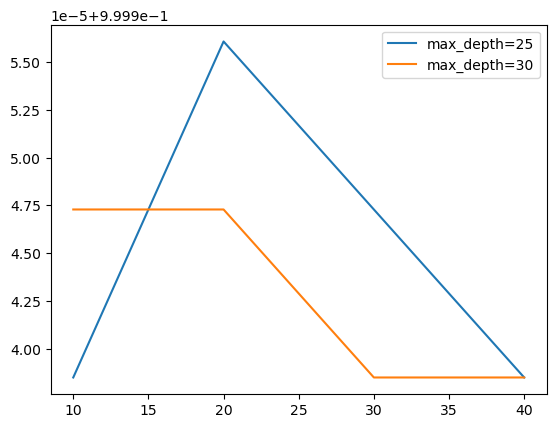

In [34]:
for d in [25, 30]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_est, df_subset.roc_auc_score, label='max_depth=%d' %d)
    
plt.legend()

In [35]:
d = 25
n = 20

Confusion matrix, without normalization


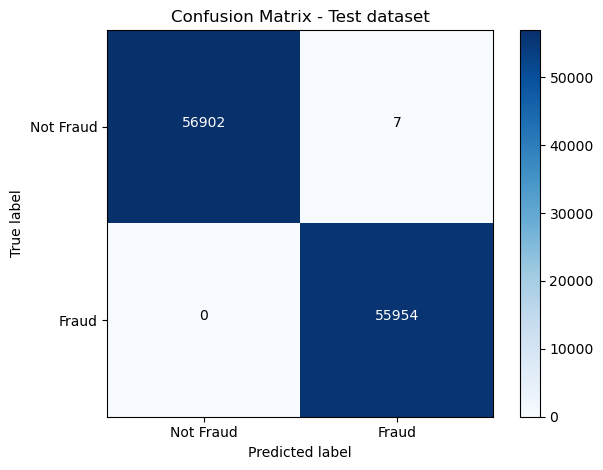

In [36]:
rf = RandomForestClassifier(
        n_estimators=n,
        max_depth=d,
        random_state=1,
        n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred.round())
plot_confusion_matrix(cm, classes = ['Not Fraud', 'Fraud'], title = 'Confusion Matrix - Test dataset')

## Save the model

In [58]:
# Creating dictionary vectorizer

from sklearn.feature_extraction import DictVectorizer
dv =  DictVectorizer(sparse=False)

train_dicts = X_train.reset_index(drop=True).to_dict(orient='records')

In [59]:
import pickle

In [60]:
output_file = f'model_{d}_{n}'

In [67]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv,rf), f_out)

In [62]:
card = {'V1': -1.377245329,
 'V2': 0.714822534,
 'V3': 2.507512766,
 'V4': 0.865082434,
 'V5': -0.290489181,
 'V6': 1.077327555,
 'V7': 0.032507083,
 'V8': 0.510945608,
 'V9': 0.717788301,
 'V10': -0.256417813,
 'V11': 0.316423719,
 'V12': 0.759520508,
 'V13': -1.439420629,
 'V14': -0.592772797,
 'V15': -2.397140825,
 'V16': -1.072538941,
 'V17': 0.615996407,
 'V18': -0.58145074,
 'V19': 0.714980257,
 'V20': -0.125335333,
 'V21': -0.341852731,
 'V22': -0.60673121,
 'V23': -0.0997405,
 'V24': -0.009123052,
 'V25': 0.32837917,
 'V26': -0.506683335,
 'V27': -0.032234738,
 'V28': 0.139840723,
 'NormAmount': -0.299135286762843}

print(card)

{'V1': -1.377245329, 'V2': 0.714822534, 'V3': 2.507512766, 'V4': 0.865082434, 'V5': -0.290489181, 'V6': 1.077327555, 'V7': 0.032507083, 'V8': 0.510945608, 'V9': 0.717788301, 'V10': -0.256417813, 'V11': 0.316423719, 'V12': 0.759520508, 'V13': -1.439420629, 'V14': -0.592772797, 'V15': -2.397140825, 'V16': -1.072538941, 'V17': 0.615996407, 'V18': -0.58145074, 'V19': 0.714980257, 'V20': -0.125335333, 'V21': -0.341852731, 'V22': -0.60673121, 'V23': -0.0997405, 'V24': -0.009123052, 'V25': 0.32837917, 'V26': -0.506683335, 'V27': -0.032234738, 'V28': 0.139840723, 'NormAmount': -0.299135286762843}


In [66]:
X = dv.fit_transform([card])

print(rf.predict(X)[0])

0


/Users/tatyjanaankudo/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
